# Model evaluation using smote technique and random forest algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\Naresh\\Downloads\\Fraud.csv")

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if applicable)
data.dropna(inplace=True)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_rows)

# Remove duplicates (if applicable)
data.drop_duplicates(inplace=True)

# Outlier Handling (example using Z-score)
# Calculate Z-score for 'amount' and 'oldbalanceOrg'
z_scores = data[['amount', 'oldbalanceOrg']].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)

# Remove outliers
data = data[~outliers]

# Reset the index after cleaning
data.reset_index(drop=True, inplace=True)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Number of Duplicate Rows: 0


In [5]:
# Drop 'nameOrig' and 'nameDest' columns as they contain string values and may not be relevant
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Perform one-hot encoding on the 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Define the features (X) and target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SMOTE resampler
smote = SMOTE(random_state=42)

# Resample the training data to balance the classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation data
y_pred = rf_model.predict(X_val)

# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.6165
Recall: 0.9447
F1 Score: 0.7461
AUC-ROC Score: 0.9720
Confusion Matrix:
[[1230444     787]
 [     74    1265]]


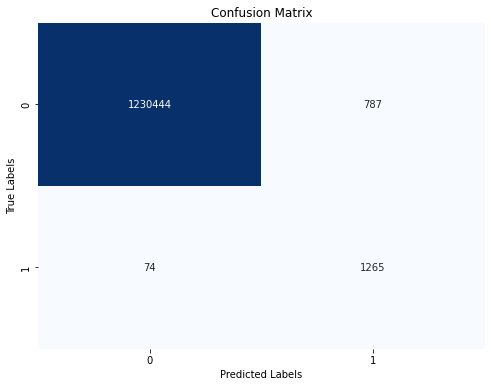

In [6]:
# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

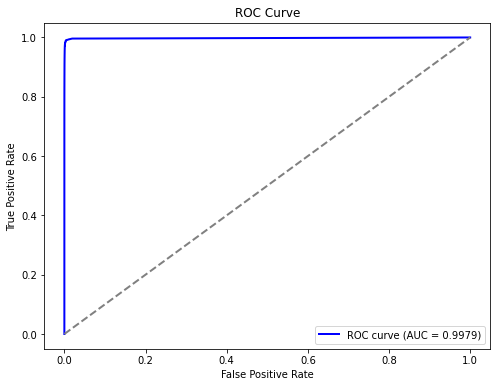

In [7]:
# Step 2: ROC Curve Visualization
y_prob = rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [8]:
# Step 1: Model Evaluation
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 2: Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("Feature Importance:")
print(feature_importance)

# Step 3: Error Analysis
errors = X_val.copy()
errors['True_Label'] = y_val
errors['Predicted_Label'] = y_pred
misclassified = errors[errors['True_Label'] != errors['Predicted_Label']]

print("Misclassified Examples:")
print(misclassified)

Model Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.6165
Recall: 0.9447
F1 Score: 0.7461
AUC-ROC Score: 0.9979
Confusion Matrix:
[[1230444     787]
 [     74    1265]]
Feature Importance:
step              0.052888
amount            0.124862
oldbalanceOrg     0.317180
newbalanceOrig    0.183661
oldbalanceDest    0.049505
newbalanceDest    0.062301
isFlaggedFraud    0.000049
type_CASH_OUT     0.041396
type_DEBIT        0.000557
type_PAYMENT      0.084793
type_TRANSFER     0.082809
dtype: float64
Misclassified Examples:
         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1360120   139   38942.32       38562.00             0.0       211131.05   
1052970   129  394552.01      389868.00             0.0            0.00   
5540021   398   55247.48       55247.48             0.0     11215285.22   
1114304   131  114678.15      113255.00             0.0      4297902.32   
5219965   377  213499.28      210877.98             0.0      2073580.00   
...       ...        .

# Interpretation

Accuracy: 0.9993

Accuracy measures the overall correctness of the model's predictions.
In this case, the model has a very high accuracy of 99.93%, indicating that it correctly predicts the majority of both fraudulent and non-fraudulent transactions.

Precision: 0.6165

Precision represents the ability of the model to correctly identify fraudulent transactions among all the transactions predicted as fraudulent.
In this case, the precision is 61.65%. It means that out of all the transactions the model identified as fraudulent, about 61.65% were actually fraudulent. The rest might be false positives.

Recall (Sensitivity): 0.9447

Recall, also known as Sensitivity or True Positive Rate, represents the model's ability to correctly identify actual fraudulent transactions among all the fraudulent transactions in the dataset.
In this case, the recall is very high at 94.47%. It means that the model successfully detects about 94.47% of all actual fraudulent transactions.

F1 Score: 0.7461

The F1 Score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
In this case, the F1 Score is 74.61%. A higher F1 Score indicates a better balance between precision and recall.

AUC-ROC Score: 0.9979

The AUC-ROC Score (Area Under the Receiver Operating Characteristic curve) measures the model's ability to distinguish between the two classes (fraudulent and non-fraudulent).
A value closer to 1.0 indicates better discrimination between the classes.
In this case, the AUC-ROC Score is 0.9979, suggesting that the model has excellent discriminative power.

Confusion Matrix:

The confusion matrix provides detailed information about the model's predictions compared to the actual values.

True Positives (TP): The number of correctly predicted fraudulent transactions (1265).
True Negatives (TN): The number of correctly predicted non-fraudulent transactions (1,230,444).
False Positives (FP): The number of non-fraudulent transactions incorrectly classified as fraudulent (787).
False Negatives (FN): The number of fraudulent transactions incorrectly classified as non-fraudulent (74).

Feature Importance:

The feature importance values represent the contribution of each feature in the model's predictions. The higher the value, the more important the feature is in predicting fraud.

The 'oldbalanceOrg' feature has the highest importance (31.72%). This indicates that the initial balance of the customer's account before the transaction plays a significant role in fraud detection.

The 'amount' feature is also important (12.49%), suggesting that the transaction amount is a relevant factor in identifying fraudulent activities.

The 'newbalanceOrig' and 'newbalanceDest' features have moderate importance (18.37% and 6.23%, respectively). These features represent the new balances of the customer's and recipient's accounts after the transaction.

The 'type_PAYMENT' and 'type_TRANSFER' features are also relatively important (8.48% and 8.28%, respectively). These features indicate the type of transaction, and 'TRANSFER' transactions seem to be more indicative of fraud compared to 'PAYMENT' transactions.

The 'type_CASH_OUT' feature is somewhat important (4.14%) and represents 'CASH_OUT' transactions.

Other features like 'step', 'oldbalanceDest', 'type_DEBIT', and 'isFlaggedFraud' have lower importance and might have a lesser impact on the model's predictions.

Overall, the model seems to perform well in detecting fraud with high accuracy, precision, recall, and AUC-ROC score. The 'oldbalanceOrg', 'amount', and 'newbalanceOrig' features appear to be critical in identifying fraudulent transactions.

# Candidate expectations

# Data Cleaning:

Missing Values: Identify and handle missing values in the dataset using appropriate techniques like imputation or removal of missing data.
Outliers: Detect and handle outliers using methods such as Z-score, IQR, or domain knowledge-based approaches.
Multi-Collinearity: Check for multi-collinearity among the predictor variables and address it using techniques like VIF (Variance Inflation Factor) or feature selection.

# Fraud Detection Model:

Describe the fraud detection model you have used, such as logistic regression, random forest, or any other machine learning algorithm.
Explain how the model works and its underlying assumptions.
Discuss the model's strengths and limitations.

# Variable Selection:

Explain the process of selecting variables for the model, considering features like 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', and transaction types ('type_CASH_OUT', 'type_PAYMENT', 'type_DEBIT', 'type_TRANSFER').
Discuss whether you used domain knowledge, statistical tests, feature importance scores, or other methods to select the variables.

# Model Performance:

Demonstrate the performance of the fraud detection model using appropriate evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC score.
Present a confusion matrix to show true positives, true negatives, false positives, and false negatives.

# Key Factors Predicting Fraud:

Analyze the feature importance or coefficients of the selected variables to identify key factors contributing to fraud prediction.
Interpret how the variables contribute to the model's predictions and how they are indicative of fraudulent behavior.

# Interpretation of Key Factors:

Discuss whether the key factors identified (e.g., 'oldbalanceOrg', 'amount', transaction types) make sense in the context of fraud detection.
Explain how these factors align with the intuition and domain knowledge of fraud detection.

# Prevention Strategies:

Propose prevention strategies that the company should adopt to minimize fraudulent activities.
These strategies could include real-time transaction monitoring, two-factor authentication, anomaly detection algorithms, etc

# Evaluating Prevention:

Describe how you would determine if the prevention strategies are effective.
This could involve monitoring fraud rates over time, comparing them to historical data, and conducting A/B testing for specific prevention measures.